Projektaufgabe Interpolation     Okhtay Wahid Far 870485

## Aufgabenstellung:

**Aufgabe 1** [10 Punkte] Implementieren Sie ein Python-Modul `interpol1d.py` , welches die folgenden Funktionalitäten bereitstellt:
+ Eine Funktion `polinterpol(x, xi, yi)` welche die  Auswertungen des Interpolationspolynoms mit Stützstellen `xi` und Stützwerten `yi` an den Stellen `x` zurückliefert. Der Grad des Polynoms ist dabei durch die Anzahl der Stützspunkte festgelegt. Die Berechnung soll in der Newtonbasis erfolgen. Achten sie auf eine effiziente Implementierung. 

+ Eine Funktion `splineinterpol(x, xi, yi)` , welche die Auswertungen des natürlichen kubischen Splines mit Stützstellen `xi` und Stützwerten `yi` an den Stellen `x` zurückliefert.

**Aufgabe 2** [10 Punkte] Vergleichen Sie experimentell die Approximationseigenschaften der kubischen Spline-Interpolation und der Polynominterpolation für die Rungefunktion 
$$
f(x) = \frac{1}{1 + x^2}, \quad x \in [-5, 5]
$$
für steigende $n$ (die Anzahl der Stützstellen sollte ungerade gewählt werden, damit das Maximum von $f$ interpoliert wird. Verwenden Sie dabei für die Polynominterpolation auch die Tschebischeffknoten). Visualisieren Sie einige Ergebnisse geeignet. Können Sie für die Spline-Interpolation die theoretische Fehlerordnung $\mathcal{O}(h^4)$ experimentell bestätigen (z.B. mit doppeltlogarithmischer Darstellung des experimentellen Fehlers über $h$)?

**Aufgabe 3** [10 Punkte] Stellen Sie in einem Projektbericht kurz das Thema der Polynom- und der Splineinterpolation vor (keine detaillierten Formeln, aber das konzeptionelle Vorgehen). Beschreiben Sie Besonderheiten der Implementierung (Aufgabe 1) und dokumentieren und interpretieren Sie die Ergebnisse (Aufgabe 2). Am Einfachsten ist es, den Projektbericht als Jupyter Notebook zu erstellen. Sie können aber auch eine PDF-Datei abgeben, in der Sie dann entsprechende Grafiken mit eingebunden hagen.

**Zusatzaufgabe** [5 Punkte] Splinekurven:
Beliebige Punkte in der Ebene, die nicht mehr notwendigerweise auf dem Graphen einer Funktion liegen, lassen sich wie folgt mit einem Spline interpolieren: Es wird getrennt für die x-Koordinaten und für die y-Koordinaten eine Splineinterpolierende berechnet. Dazu könnten z.B, die Indizes der Stützpunkte als die Knotenwerte einer Parametrisierung gewählt werden: Ein Spline $s_x$ interpoliert die Daten $(t_i, x_i$ ein zweiter Spline $s_y$ die Daten $(t_i, y_i$, mit $t_i = i$. Die Kurve 

$$
t \mapsto (s_x(t), s_y(t)), \quad t \in [0, n]
$$ 

interpoliert dann die Punkte $(x_i, y_i)$ in der Ebene. Führen Sie dies an ein paar Beispielen durch. Weitere Hinweise gerne in der Übung.

Es können maximal 30 Punkte erreicht werden - die Zusatzaufgabe kann also an anderer Stelle fehlende Punkte ausgleichen oder einfach nur Spaß machen.

## Hinweise:

**zu Aufgabe 1**
+ Die häufigsten möglichen Fehleingaben sollen mit einem Exception-Handling abgefangen werden. Die Ein- und Ausgabeparameter sind mit einem Docstring zu dokumentieren (so wie von Spyder vorgeschlagen beim Definieren einer neuen Funktion)
+ Sie können alle in den bisherigen Notebooks implementierten Funktionen als Ausgangspunkt verwenden
+ Bei der Funktion `splineinterpol(x, xi, yi)` können sie z.B in etwa folgendermaßen vorgehen, um jeweils den richtigen lokalen Spline (also das lokale kubische Polynom) auszuwerten (in einer Schleife über $j$):
```
# ind enthält alle Indizes von x-Werten, die in j.ten Intervall liegen:
ind    = np.nonzero( (xi[j] <= x) &  (x < xi[j+1]) )  
y[ind] = splinej(x[ind], j, xi, yi, mi)
```

**zu Aufgabe 2:** 
+ Die Ergebnisse sind geeignet in dem Projektbericht zu dokumentieren - entweder als Jupyter-Notebook, oder in einer PDF-Datei.

In [100]:
import numpy as np
import matplotlib.pyplot as plt

In [101]:
# Auswertung des Polynoms mit Koeffizienten b und Stuetzstellen xk, an den Stellen x
def polNewtonHorner(b, xk, x):
    """ Polynomonauswertung y = b[0] + b[1]*(x - xk[0]) + ... + b[n]*(x - x[0])* ... *(x - x[n-1]),
    mit Hornerschema """
    y = np.ones(x.shape) * b[-1]
    for j in range(len(b)-2, -1, -1):
        y = b[j] + (x - xk[j])*y
    return y

In [255]:
def koeffNewtonBasis(xk, yk):
    """ Berechnung mit dem rekursiven Schema der dividierten Differenzen - iterativ implementiert """
    m = len(xk)
    F = np.zeros((m,m)) # in der linken unteren Dreiecksmatrix werden alle berechneten dividierten Differenzen gespeichtert, 
                        # auf der Diagonalen liegen dann die gesuchen Koeffizienten b_i
   
    F[:,0] = yk
    for j in range(1, m):     # j-te dividierte Diffenzen
        for i in range(j, m):
            F[i, j] = (F[i,j-1] - F[i-1,j-1])/(xk[i] - xk[i-j])
    # print(F)        # fuer Fehlersuche
    return np.diag(F)

In [256]:
def polinterpol(x, xi, yi):
    b  = koeffNewtonBasis(xi, yi)
    y = polNewtonHorner(b, xi, x)
    return y

In [257]:
def splinej(x, j, xi, yi, mi):
    '''Auswertung des kubischen Polynoms s_j'''
    h = xi[j+1] - xi[j]
    s = ( mi[j]*(xi[j+1] - x)**3 + mi[j+1]*(x - xi[j])**3 )/6/h  \
    + ( yi[j]*(xi[j+1] - x)    + yi[j+1]*(x - xi[j])    )/h      \
    -   ( mi[j]*(xi[j+1] - x)    + mi[j+1]*(x - xi[j])    )*h/6.
    return s

In [265]:
def curv(yi, h):
    '''Berechnung der zweiten Ableitungen des natuerlichen Splines s an den Knoten xi'''
    mi = np.zeros(xi.shape) # zweiten Ableitungen
    b = np.zeros(xi.shape)  # rechte Seite des LGS
    # Berechnung der rechten Seite des LGS
    b[1:-1] = yi[:-2] - 2*yi[1:-1] + yi[2:]
    b = b * 6 / h**2
    
    N = len(b) - 2 # n-2 unbekannte
    A = np.zeros((N, N), dtype=float) # linke Seite LGS
    # Erstellung der Tridiogonal-Matrix mit Werten [1,4,1]
    for i in range(0,N-1):
        A[i][i] = 4
        A[i][i+1] = 1
        A[i+1][i] = 1
    A[-1][-1] = 4
    # Berechnung der mi durch loesen der LGS
    mi[1:-1] = np.linalg.solve(A, b[1:-1])
    return mi

In [266]:
def splineinterpol(x, xi, yi):
    """
    Auswertungen des natürlichen kubischen Splines 
    mit Stuetzstellen xi und Stuetzwerten yi 
    an den Stellen x

    Parameters
    ----------
    x  : array_float
         Auswertungsstellen.
    xi : array_float
         Stuetzstellen.
    yi : array_float
         Stuetzwerten.

    Returns
    -------
    array_float
        Auswertungen des natürlichen kubischen Splines an den Stellen x.
    """
    
    # Fehler
    if len(xi) != len(yi) :
        raise Exception("Fehler, die Vektoren Stuetzstellen und Stuetzwerten sollten gleich lang sein")
    if len(xi) < 2 :
        raise Exception("Fehler, die Vektoren Stuetzstellen und Stuetzwerten sind zu klein")
    if len(x) < 2 :
        raise Exception("Fehler, die Vektor der Auswertungsstellen sind zu klein")
        
    n = len(xi) # laenge
    # Schrittwite der aequidistante Stuetzstellen
    h = xi[1] - xi[0]
    # mj: zweiten Ableitungen des Splines s an den Knoten xj
    mi = curv(yi,h)
    y = np.zeros(x.shape) # Array fuer Auswertungen
    # Auswertungen
    for j in range(0,n - 1):
        # ind enthält alle Indizes von x-Werten, die in j.ten Intervall liegen:
        ind    = np.nonzero( (xi[j] <= x) &  (x < xi[j+1]) )
        # Auswertung
        y[ind] = splinej(x[ind], j, xi, yi, mi)
    y[-1] = yi[-1] # fuer xn
    return y

In [ ]:
# Aufgabe 2

In [ ]:
def runge(x):
    ''' Rungefunktion '''
    y = 1/(1 + x**2)
    return y

In [253]:
def t(n, a, b):
    ''' 
    Tschebyscheff-Knoten 
    
    Parameters
    ----------
    n  : int
         Anzahl der Stuetzstellen.
    a  : float
         linker Intervallrand .
    b  : float
         rechter Intervallrand .

    Returns
    -------
    array_float
        Tschebyscheff-Knoten-Stuetzstellen.
    '''
    ind = np.arange(0, n+1)
    xi = np.cos( (2*ind + 1)/(2*n + 2)*np.pi ) 
    xi = (xi + 1)*(b-a)/2 + a    # affine Abbildung [-1, 1] --> [a, b] 
    return xi

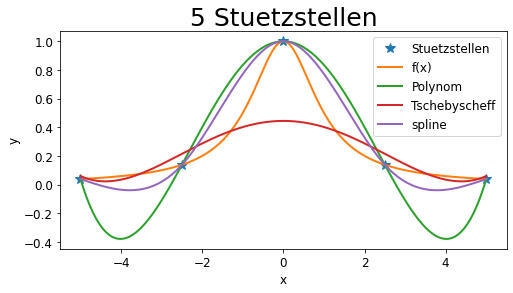

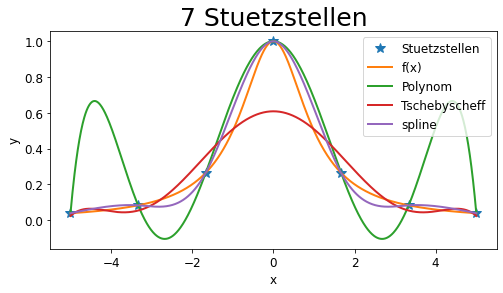

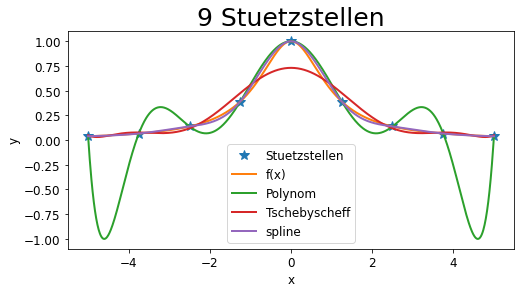

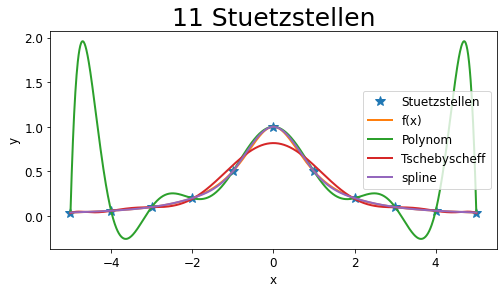

In [267]:


a = -5. # linker Intervallrand  
b = 5.  # rechter Intervallrand 



# Punkte, an denen Funktion und Polynom ausgewertet werden sollen    
x = np.linspace(a, b, 1000, dtype=float)

# Funktionsauswertung
y_runge = runge(x)


## ----------------- Berechnung der Interpolationen ----------------------------------
# n: Anzahl der Stützstellen
for n in range(5,13, 2):
    # aequidistante Stuetzstellen
    xi = np.linspace(a, b, n, dtype=float)

    # Stuetzwerte
    yi = runge(xi)

    # Polynominterpolation mit aequidistante Stuetzstellen
    y_interpol = polinterpol(x, xi, yi)

    # Tschebyscheff-Knoten
    xi_tschebyscheff = t(n, a, b)

    # Stuetzwerte der Tschebyscheff-Knoten
    yi_tschebyscheff = runge(xi_tschebyscheff)

    # Polynominterpolation mit Tschebyscheff-Knoten
    y_interpol_t = polinterpol(x, xi_tschebyscheff, yi_tschebyscheff)

    # spline
    y_spline = splineinterpol(x, xi, yi)


    # ----------------- Visualisierung ----------------------------------
    plt.rcParams.update({'font.size': 12})
    plt.figure(figsize=(8,4))
    plt.plot(xi, yi, '*', markersize=10)
    plt.plot(x, y_runge, x, y_interpol, x, y_interpol_t, x, y_spline, linewidth = 2);
    plt.legend(['Stuetzstellen', r'f(x)', r'Polynom', r'Tschebyscheff', r'spline']);
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(str(n) + " Stuetzstellen",fontsize=25)
    plt.show()

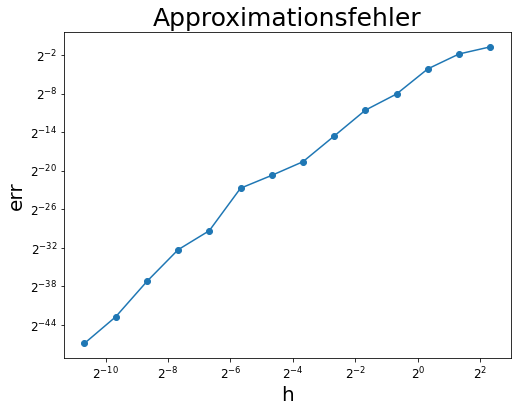

In [254]:
# Fehler
a = -5. # linker Intervallrand  
b = 5.  # rechter Intervallrand 

h = np.zeros((14,), dtype=float)
err = np.zeros((14,), dtype=float)

# ----------------- Berechnung der Approximationsfehler --------------
for k in range(1,15):
    n = 2**k + 1 # Anzahl der Stützstellen
    # Punkte, an denen Funktion und Polynom ausgewertet werden sollen    
    x = np.linspace(a, b, 1000, dtype=float)
    # Funktionsauswertung
    y_runge = runge(x)
    # aequidistante Stuetzstellen
    xi = np.linspace(a, b, n, dtype=float)
    # Stuetzwerte
    yi = runge(xi)
    # spline
    y_spline = splineinterpol(x, xi, yi)
    # Approximationsfehler in der L-Unendlich-Norm
    err[k-1] = np.max(np.abs(y_spline - y_runge)) 
    # Schrittwite der aequidistante Stuetzstellen
    h[k-1] = (b-a)/(n-1)
    
# ----------------- Visualisierung ----------------------------------
fig = plt.figure(figsize=(8, 6))
plt.scatter(h,err)
plt.plot(h,err)
plt.loglog(base=2)
plt.xlabel("h",fontsize=20)
plt.ylabel("err",fontsize=20)
plt.title("Approximationsfehler",fontsize=25)
plt.show()